### 结构方程模型如何估计潜变量？

在结构方程模型中，所谓的测量模型几乎完全等同于另一个概念——验证性因素分析（Confirmatory Factor Analysis，CFA），其核心是如何基于一些可观测的变量测量一个更抽象、不可观测的变量。


测量模型是基于真分数理论提出的，认为可观测的分数（observed score，OS）=真分数（True score，TS）+测量误差（Measurement Error，e），假设，我用智力测验测量智商，智力测验就是OS，实际的智商就是TS，工具的误差就是e 

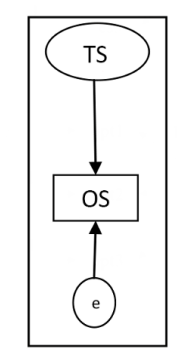

### 多个观测变量衡量一个抽象概念

#### 我们举生活满意度量表的例子

生活满意度是个概念，不是一言半语就能说明白程度的，也不会像身高体重有绝对明确的衡量指标。于是，心理学家尝试从操作定义的角度，用多道条目（item）衡量可能的行为，进而衡量行为背后的概念。

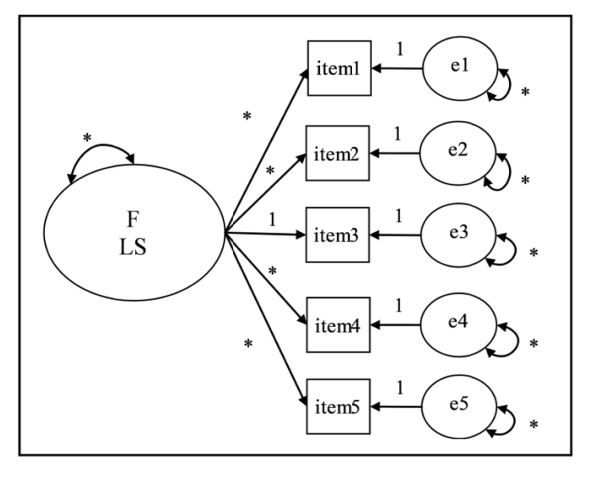

上图中，所有显变量的可以被分解为：

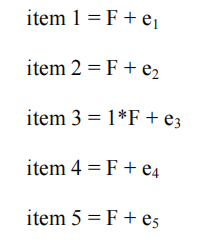

#### 两个值得注意的点：

1. 一个因子应该有多少个条目？

建议至少4个，当条目只有三个的时候，该测量模型（验证性因素模型）恰好识别（Just identified），其模型拟合不可测量、

2. 潜变量的度量（metric）如何确定？

潜变量毕竟是未测量的，其条目（显变量/观测变量）是实际上被测量的，因此需要设置：

要么，将潜变量的方差设置为1，所有条目对潜变量的效应反映其解释了多少潜变量的变异。

要么，将其中一个条目的因子载荷设置为1（如上图），这是该条目相当于被当做了参照标准，其他条目对潜变量的影响参照该条目，小于1，则不如该条目，大于1则大于该条目。

#### 在lavaan中定义验证性因素分析模型

In [1]:
library(lavaan)

Warning message:
"程辑包'lavaan'是用R版本4.2.3 来建造的"
This is lavaan 0.6-16
lavaan is FREE software! Please report any bugs.



In [2]:
# 载入数据
BASE <- read.csv("C:/Users/77387/Desktop/Data_analysis_courses/R语言与结构方程模型/data/data3_10.csv")

In [17]:
head(BASE)

,id,item1,item2,item3,item4,item5,X,X.1,X.2,X.3,...,X.30,X.31,X.32,X.33,X.34,X.35,X.36,X.37,X.38,X.39
,<int>,<int>,<int>,<int>,<int>,<int>,<lgl>,<lgl>,<lgl>,<lgl>,...,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,1,2,2,4,2,2,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,2,7,7,7,6,7,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,3,6,3,5,5,5,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,4,2,1,1,1,2,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,5,1,1,1,1,1,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,6,2,4,4,4,7,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [3]:
# 定义模型
model.SPE <- 'LS =~ item3 + item1 + item2 + item4 + item5' 

In [4]:
# 模型拟合
model.EST <-cfa (model.SPE, data = BASE, estimator = "MLR")

In [5]:
# 提取模型
summary (model.EST,
         fit.measures = TRUE, 
         standardized = TRUE,
         rsq = TRUE, 
         modindices = TRUE)

lhs,op,rhs,exo,est,se,z,pvalue,std.lv,std.all,std.nox
<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
LS,=~,item3,0,1.0000000,0.00000000,NA,NA,1.2771581,0.7661992,0.7661992
LS,=~,item1,0,0.8589443,0.13115551,6.549052,5.790324e-11,1.0970077,0.5550862,0.5550862
LS,=~,item2,0,0.9912457,0.11458965,8.650395,0.000000e+00,1.2659775,0.6767968,0.6767968
LS,=~,item4,0,1.2264859,0.08477213,14.468031,0.000000e+00,1.5664164,0.8861091,0.8861091
LS,=~,item5,0,0.9533607,0.12148512,7.847552,4.218847e-15,1.2175924,0.6400659,0.6400659
item3,~~,item3,0,1.1473384,0.21810652,5.260450,1.437035e-07,1.1473384,0.4129387,0.4129387
item1,~~,item1,0,2.7022711,0.27457040,9.841815,0.000000e+00,2.7022711,0.6918793,0.6918793
item2,~~,item2,0,1.8962323,0.25608816,7.404607,1.314504e-13,1.8962323,0.5419461,0.5419461
item4,~~,item4,0,0.6712681,0.19577676,3.428743,6.063841e-04,0.6712681,0.2148107,0.2148107


In [6]:
# 计算可靠性系数（reliability coefficient）

library(semTools)

reliability (model.EST)

 

###############################################################################

This is semTools 0.5-6

All users of R (or SEM) are invited to submit functions or ideas for functions.

###############################################################################



,LS
alpha,0.8316982
omega,0.8283265
omega2,0.8283265
omega3,0.8159017
avevar,0.4946876


#### lavaa 中默认第一个条目的因子载荷固定为1，如何使其如上图一样固定为条目3呢？

In [7]:
model.SPE <- 'LS =~ NA*item3 + item1 + item2 + item4 + item5'

#### 如何获取参数估计的95%置信区间？

In [8]:
parameterEstimates (model.EST)

lhs,op,rhs,est,se,z,pvalue,ci.lower,ci.upper
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
LS,=~,item3,1.0000000,0.00000000,NA,NA,1.0000000,1.000000
LS,=~,item1,0.8589443,0.13115551,6.549052,5.790324e-11,0.6018842,1.116004
LS,=~,item2,0.9912457,0.11458965,8.650395,0.000000e+00,0.7666541,1.215837
LS,=~,item4,1.2264859,0.08477213,14.468031,0.000000e+00,1.0603355,1.392636
LS,=~,item5,0.9533607,0.12148512,7.847552,4.218847e-15,0.7152543,1.191467
item3,~~,item3,1.1473384,0.21810652,5.260450,1.437035e-07,0.7198575,1.574819
item1,~~,item1,2.7022711,0.27457040,9.841815,0.000000e+00,2.1641230,3.240419
item2,~~,item2,1.8962323,0.25608816,7.404607,1.314504e-13,1.3943087,2.398156
item4,~~,item4,0.6712681,0.19577676,3.428743,6.063841e-04,0.2875527,1.054984


#### 显变量的covariance matrix 

cov(BASE)

#### model-implied covariance matrix/ reproduced matrix

两显变量的reproduced covariance = 第一个显变量的完全标准化效应 * 第二个显变量的完全标准化效应

当然也可以用下面函数一步到位提出来：

In [9]:
fitted(model.EST)

,item3,item1,item2,item4,item5
item3,2.778471,1.401052,1.616853,2.000561,1.555058
item1,1.401052,3.905697,1.388787,1.718371,1.335708
item2,1.616853,1.388787,3.498931,1.983048,1.541445
item4,2.000561,1.718371,1.983048,3.124929,1.907257
item5,1.555058,1.335708,1.541445,1.907257,3.618715


In [18]:
cov(BASE[c("item1","item2","item3","item4","item5")],use="complete.obs")

,item1,item2,item3,item4,item5
item1,3.921135,1.801189,1.093399,1.641779,1.817404
item2,1.801189,3.512760,1.642993,1.886652,1.645903
item3,1.093399,1.642993,2.789456,2.107778,1.354580
item4,1.641779,1.886652,2.107778,3.137282,1.902337
item5,1.817404,1.645903,1.354580,1.902337,3.633018


####  To obtain the residual correlations matrix (S - Σ):

In [19]:
residuals (model.EST, type = "raw")

,item3,item1,item2,item4,item5
item3,2.249532e-06,-3.119582e-01,1.967080e-02,9.891773e-02,-2.058114e-01
item1,-3.119582e-01,8.054594e-07,4.053105e-01,-8.305562e-02,4.745403e-01
item2,1.967080e-02,4.053105e-01,-8.056263e-07,-1.038242e-01,9.797818e-02
item4,9.891773e-02,-8.305562e-02,-1.038242e-01,1.740255e-06,-1.240894e-02
item5,-2.058114e-01,4.745403e-01,9.797818e-02,-1.240894e-02,-6.112083e-07


### 当一测量模型包含两个因素——两因素验证性因素分析

举例，以下是乐观量表，包含两个相对独立的维度

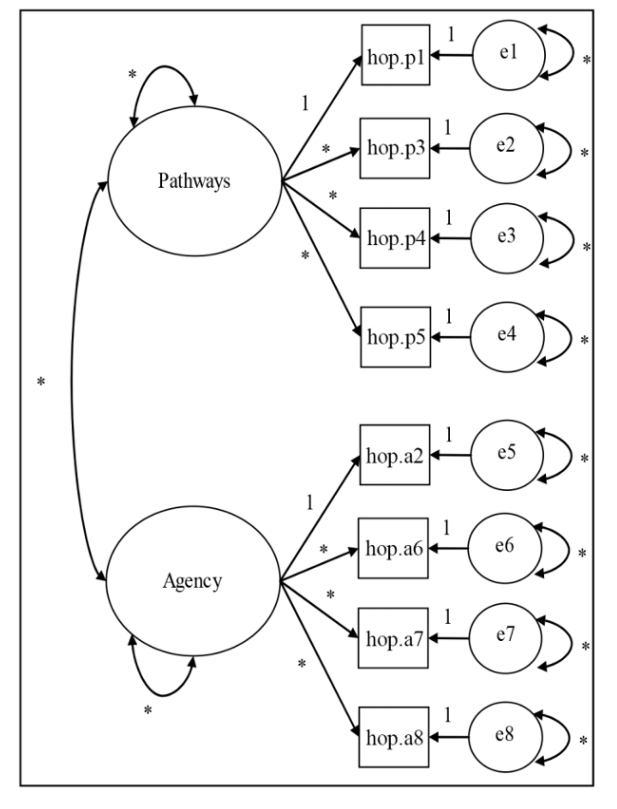

从上面模型，我们可知，每一个条目可以被分解为：

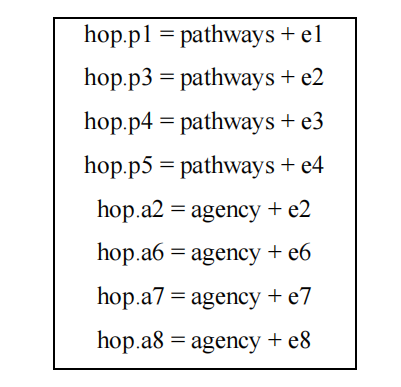

#### 我们在lavaan中定义该模型

lavaan会自动设置潜变量之间covariance，

潜变量的covariance反映两潜变量的区分效度，一般情况下，区分效度过低（covariance过高）提醒最好把两个潜变量合并。在重测模型中不是这样。

In [22]:
#数据
BASE <- read.csv("C:/Users/77387/Desktop/Data_analysis_courses/R语言与结构方程模型/data/data3_11.csv")

model.SPE <- 'pathways =~ hop.p1 + hop.p3 + hop.p4 + hop.p5 
              agency =~ hop.a2 + hop.a6 + hop.a7 + hop.a8

'

#### 模型拟合

In [23]:
model.EST <- cfa (model.SPE, data = BASE, estimator = "MLR")

#### 提取模型结果

In [24]:
summary (model.EST, 
         fit.measures = TRUE, 
         standardized = TRUE, 
         modindices = TRUE)

lhs,op,rhs,exo,est,se,z,pvalue,std.lv,std.all,std.nox
<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
pathways,=~,hop.p1,0,1.0000000,0.00000000,NA,NA,0.4666087,0.4707868,0.4707868
pathways,=~,hop.p3,0,2.4754451,0.70275937,3.522465,4.275539e-04,1.1550643,0.6303454,0.6303454
pathways,=~,hop.p4,0,1.9759091,0.39999228,4.939868,7.817538e-07,0.9219764,0.6235902,0.6235902
pathways,=~,hop.p5,0,2.2270850,0.65772916,3.386021,7.091386e-04,1.0391773,0.6338680,0.6338680
agency,=~,hop.a2,0,1.0000000,0.00000000,NA,NA,1.5427511,0.8246905,0.8246905
agency,=~,hop.a6,0,0.7923199,0.07533972,10.516629,0.000000e+00,1.2223524,0.6185108,0.6185108
agency,=~,hop.a7,0,0.9410206,0.07177723,13.110295,0.000000e+00,1.4517606,0.7761177,0.7761177
agency,=~,hop.a8,0,0.6674817,0.07915367,8.432732,0.000000e+00,1.0297581,0.6177776,0.6177776
hop.p1,~~,hop.p1,0,0.7646057,0.13924973,5.490895,3.999015e-08,0.7646057,0.7783598,0.7783598
